In [6]:
%matplotlib inline  
import librosa
import librosa.display
import IPython
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import ffmpeg

In [2]:
audio_data = 'audio.mp3'
y, sr = librosa.load(audio_data)

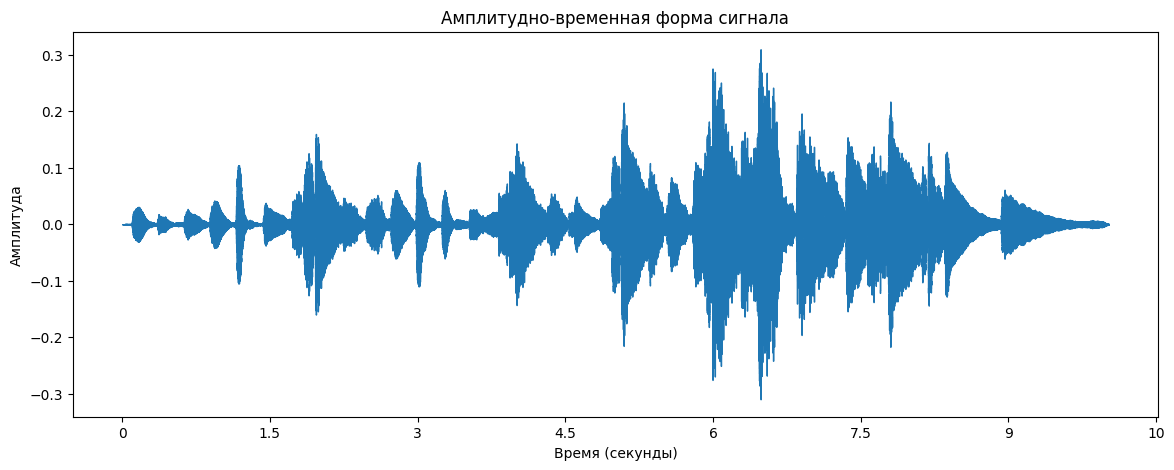

In [42]:
# 1. Амплитудно-временная форма сигнала
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Амплитудно-временная форма сигнала")
plt.xlabel("Время (секунды)")
plt.ylabel("Амплитуда")
plt.show()

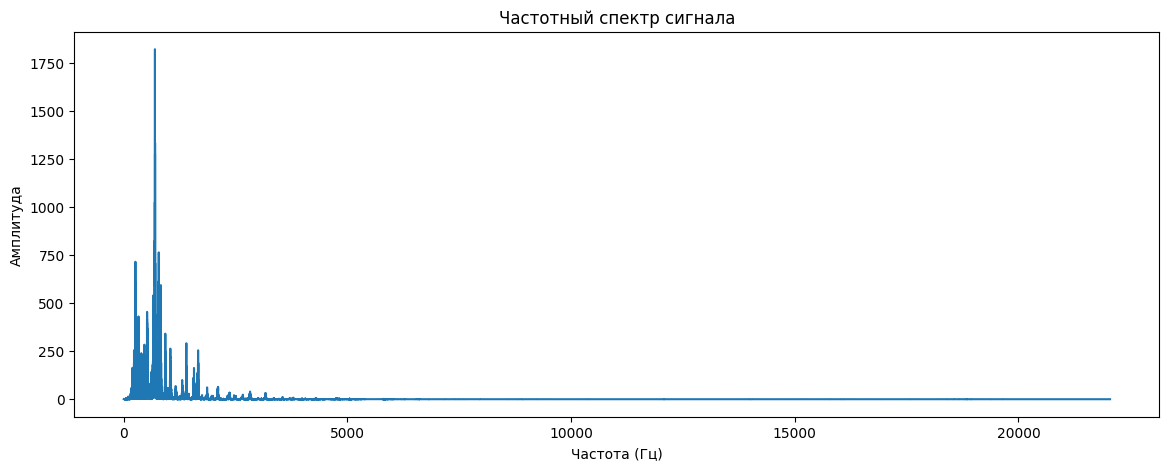

In [43]:
# 2. Частотный спектр (Прямое преобразование Фурье)
Y = np.fft.fft(y)
frequencies = np.fft.fftfreq(len(Y), 1/sr)
plt.figure(figsize=(14, 5))
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y[:len(Y)//2]))
plt.title("Частотный спектр сигнала")
plt.xlabel("Частота (Гц)")
plt.ylabel("Амплитуда")
plt.show()

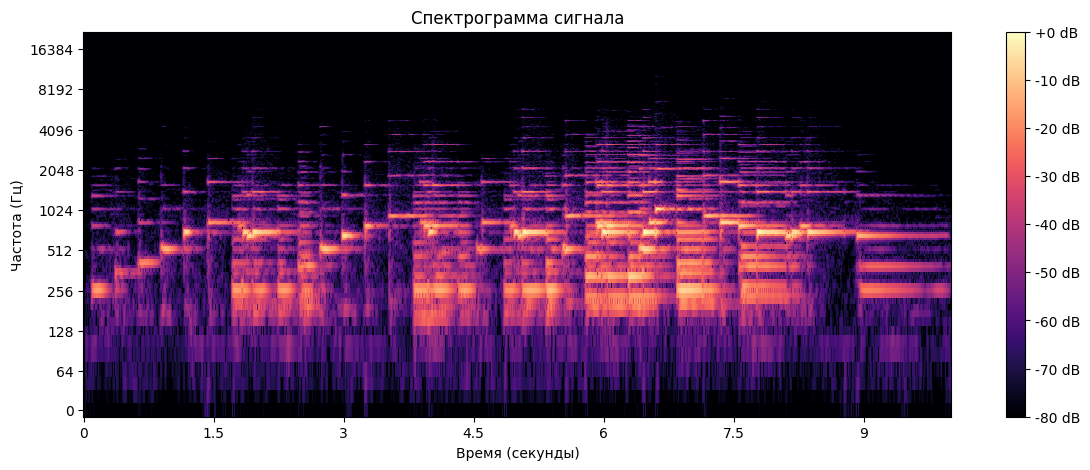

In [44]:
# 3. Спектрограмма сигнала (STFT)
plt.figure(figsize=(14, 5))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format="%+2.0f dB")
plt.title("Спектрограмма сигнала")
plt.xlabel("Время (секунды)")
plt.ylabel("Частота (Гц)")
plt.show()

In [45]:
# 4. Вычисление темпа и битов
y_percussive = librosa.effects.percussive(y)
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive, sr=sr)
print('Темп: ' + str(tempo) + ' ударов/мин')

Темп: [120.18531977] ударов/мин


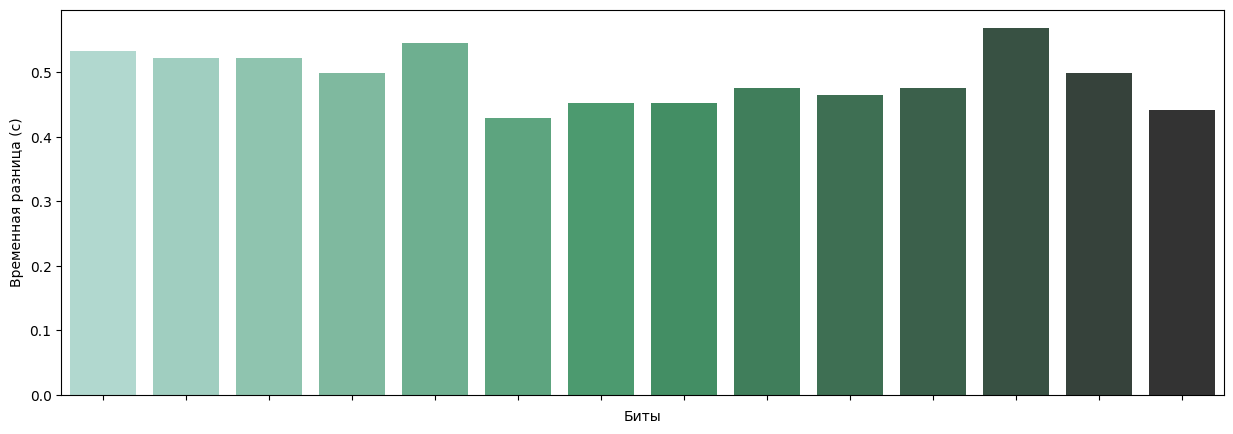

In [46]:
# График временной разницы между ударами
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_ylabel("Временная разница (с)")
ax.set_xlabel("Биты")

# Устанавливаем beat_nums как `hue` и отключаем легенду для suppressing предупреждения
sns.barplot(x=beat_nums, y=beat_time_diff, hue=beat_nums, palette="BuGn_d", ax=ax, legend=False)
ax.set_xticklabels([])

plt.show()


In [47]:
# Ошибка в исходном коде заключалась в неправильном порядке аргументов в функции barplot.
# Правильный порядок - передача beat_nums и beat_time_diff как именованных аргументов x и y соответственно.

MFCC как numpy массив: [[-6.4208813e+02 -6.4136047e+02 -6.3006476e+02 ... -5.9064966e+02
  -5.9417511e+02 -5.9613818e+02]
 [ 0.0000000e+00  1.0252658e+00  1.6586605e+01 ...  6.6144272e+01
   6.2139259e+01  5.8687927e+01]
 [ 0.0000000e+00  1.0139976e+00  1.5437206e+01 ...  4.8741737e+01
   4.7313015e+01  4.2594238e+01]
 ...
 [ 0.0000000e+00  6.7804188e-01  2.5490675e+00 ... -4.5412415e-01
  -2.2386014e+00 -6.0181656e+00]
 [ 0.0000000e+00  6.1066192e-01  2.1666358e+00 ...  2.8820057e+00
  -9.8943239e-01 -4.8822947e+00]
 [ 0.0000000e+00  5.3926694e-01  2.2487266e+00 ...  3.2009816e+00
  -1.1107650e+00 -3.9483821e+00]]


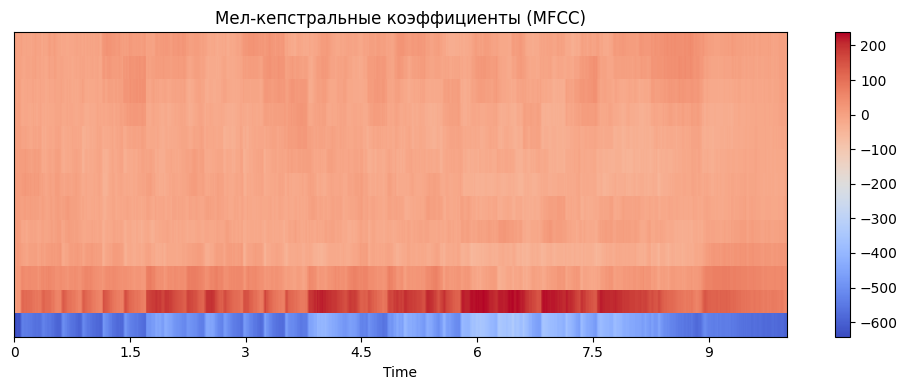

In [48]:
# 5. Вычисление мел-кепстральных коэффициентов (MFCC)
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
print("MFCC как numpy массив:", mfccs)

plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar()
plt.title("Мел-кепстральные коэффициенты (MFCC)")
plt.tight_layout()
plt.show()

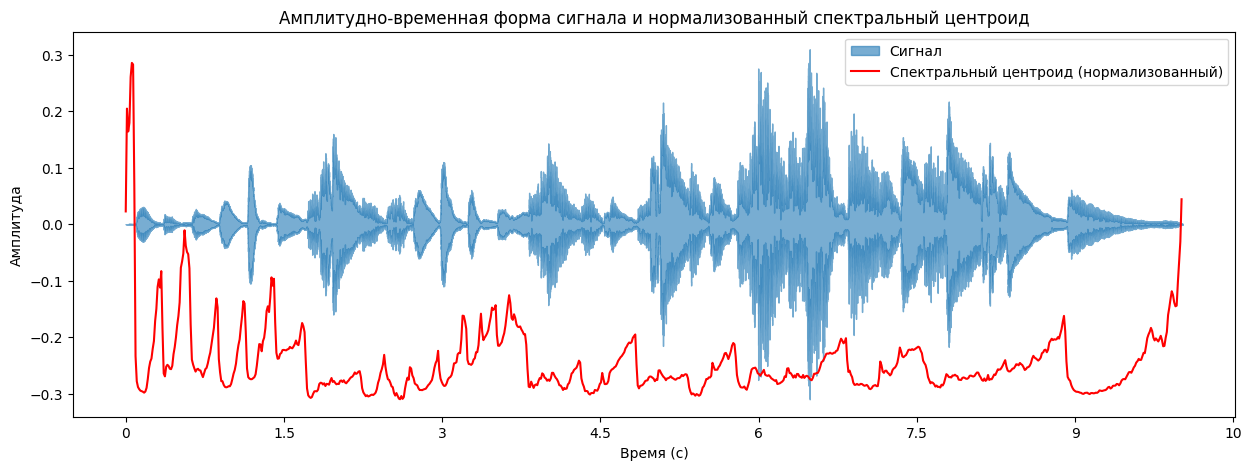

In [50]:
# 6. Вычисление спектрального центроида
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]

# Временная шкала для спектрального центроида
frames = range(len(spectral_centroids))
t_centroid = librosa.frames_to_time(frames, sr=sr)

# Нормализация спектрального центроида для визуализации на уровне сигнала
centroid_normalized = sklearn.preprocessing.minmax_scale(spectral_centroids, feature_range=(min(y), max(y)))

# Построение графиков: амплитудно-временной формы сигнала и нормализованного спектрального центроида
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr, alpha=0.6, label="Сигнал")
plt.plot(t_centroid, centroid_normalized, color='r', label="Спектральный центроид (нормализованный)")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")
plt.legend()
plt.title("Амплитудно-временная форма сигнала и нормализованный спектральный центроид")
plt.show()